# Hate Crime Project

### By Victor Ramirez

In [50]:
# Import the libraries we'll use below.

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import math
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras import models
from keras import layers

# plots
import seaborn as sns  # for nicer plots
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # default style
import plotly.express as px

from scipy import stats # For in-built method to get PCC

random.seed(2)
%matplotlib inline

## Understanding the data

Before doing any training (or evaluating), let's make sure we understand what we're working with. 

### Load the data

We'll only use a few of the columns.

In [51]:
# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
bea = pd.read_csv(
    'F:/code/uc berkeley/mids-w207/mids-w207-ml-grouproj/w207_hatecrime_census_bea_v3.csv',
    sep=',', encoding='latin-1')

hc = pd.read_csv(
    'F:/code/uc berkeley/mids-w207/mids-w207-ml-grouproj/victor_ramirez_w207_project/hc_ml.csv'
)

hc.drop(columns=['location'], inplace = True)


## Read data

In [52]:
# data EDA

print(bea.describe())

             year        month  hate_crime_incident_count  \
count  1505.00000  1505.000000                1505.000000   
mean   2015.91495     6.498339                  12.584053   
std       2.12494     3.426299                  17.411585   
min    2013.00000     1.000000                   1.000000   
25%    2014.00000     4.000000                   3.000000   
50%    2016.00000     6.000000                   6.000000   
75%    2018.00000     9.000000                  14.000000   
max    2019.00000    12.000000                 116.000000   

       BEA_percapita_personal_income  BEA_personal_income_mills     1_revenue  \
count                    1505.000000               1.505000e+03  1.505000e+03   
mean                    50434.356146               3.754547e+05  7.012920e+06   
std                     10443.695738               4.662847e+05  9.710603e+06   
min                     34259.000000               3.897800e+04  8.600000e+05   
25%                     42725.000000         

In [53]:
# data cleaning

# check for null values
print(bea.isnull().sum())

columns = bea.columns
##################
### DROP zeros ###
##################
for col in columns:
    if (bea[col] == 0).all():
        print('All values in ', col ,' column are zero dropping col')
        del bea[col]
    else:
        print('All values in ', col ,' column are not zero')
    

print('Number of features: %s' %bea.shape[1])
print('Number of examples: %s' %bea.shape[0])

print('Number of location', len(pd.unique(bea['location'])))

# Find unique values of a column
print(bea['location'].unique())

print(bea.columns.tolist())

print('Columns in my data: ', bea.columns.tolist())


location                                0
year                                    0
month                                   0
hate_crime_incident_count               0
BEA_percapita_personal_income           0
                                       ..
142_other_than_insurance_trust_funds    0
143_offsets_to_debt                     0
144_bond_funds                          0
145_other                               0
146_population                          0
Length: 146, dtype: int64
All values in  location  column are not zero
All values in  year  column are not zero
All values in  month  column are not zero
All values in  hate_crime_incident_count  column are not zero
All values in  BEA_percapita_personal_income  column are not zero
All values in  BEA_personal_income_mills  column are not zero
All values in  1_revenue  column are not zero
All values in  2_general_revenue  column are not zero
All values in  3_intergovernmental_revenue  column are not zero
All values in  4_from_federal_

In [54]:
# shuffle order
indices = np.arange(hc.shape[0])
print('indices:', indices, '\n')

# set seed
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# reindex to change the ordering of the original
hc = hc.reindex(shuffled_indices)
display(hc)


indices: [   0    1    2 ... 1502 1503 1504] 

shuffled indices: [ 968    9 1470 ... 1216  559  684] 



,72_capital_outlay,80_other_public_welfare,18_individual_income,71_higher_education,77_public_welfare,101_housing_and_community_development,83_health,3_intergovernmental_revenue,4_from_federal_government,96_protective_inspection_and_regulation,...,44_water_supply,35_sewerage,19_corporate_income,141_miscellaneous,62_interest_on_debt,115_water_supply,55_intergovernmental_expenditure,hate_crime_incident_count,year,month
968,45000,47000,185000,290000,335000,23250,35000,335000,335000,7500,...,56000,37000,32500,0.0,77000,58000,60.0,5,2016,1
9,53000,55000,290000,405000,680000,42000,69000,890000,890000,11250,...,74000,42000,44500,0.0,98000,75000,0.0,1,2015,3
1470,27000,220000,1037500,415000,1425000,96000,121250,1050000,1050000,16750,...,72000,100000,142500,0.0,155000,75000,53.0,12,2019,4
1150,5200,98000,117500,67000,295000,24750,20500,260000,260000,4100,...,9300,13750,15250,0.0,27000,12750,0.0,2,2014,11
880,49500,96000,590000,540000,1250000,98000,108750,1325000,1325000,13000,...,91000,170000,63000,0.0,180000,66000,29.5,4,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,69000,320000,1375000,790000,1700000,175000,157500,1800000,1800000,27500,...,220000,115000,370000,1125.0,580000,225000,650.0,4,2014,7
835,41500,88000,510000,485000,890000,67000,79000,950000,950000,10500,...,72000,121250,72000,0.0,177500,53000,305.0,6,2014,9
1216,72000,98000,1037500,510000,930000,123750,140000,1000000,1000000,25000,...,62000,99000,82000,18000.0,172500,87000,0.0,1,2014,12
559,56000,232500,0,900000,2200000,190000,430000,2475000,2475000,62000,...,350000,285000,190000,0.0,430000,350000,0.0,4,2016,8


## Visual EDA

In [55]:
# visual hate_crime_incident_count summary in a treemap plot

fig = px.treemap(bea, path=[px.Constant("hate_crime_incident_count EDA"), 'location', 'year', 'month'], 
                 values='hate_crime_incident_count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

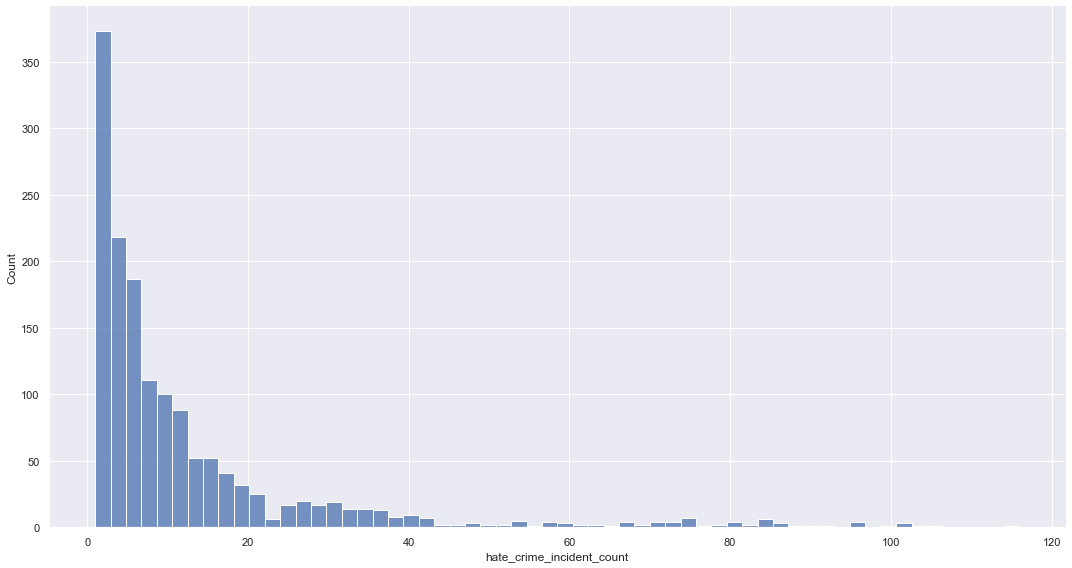

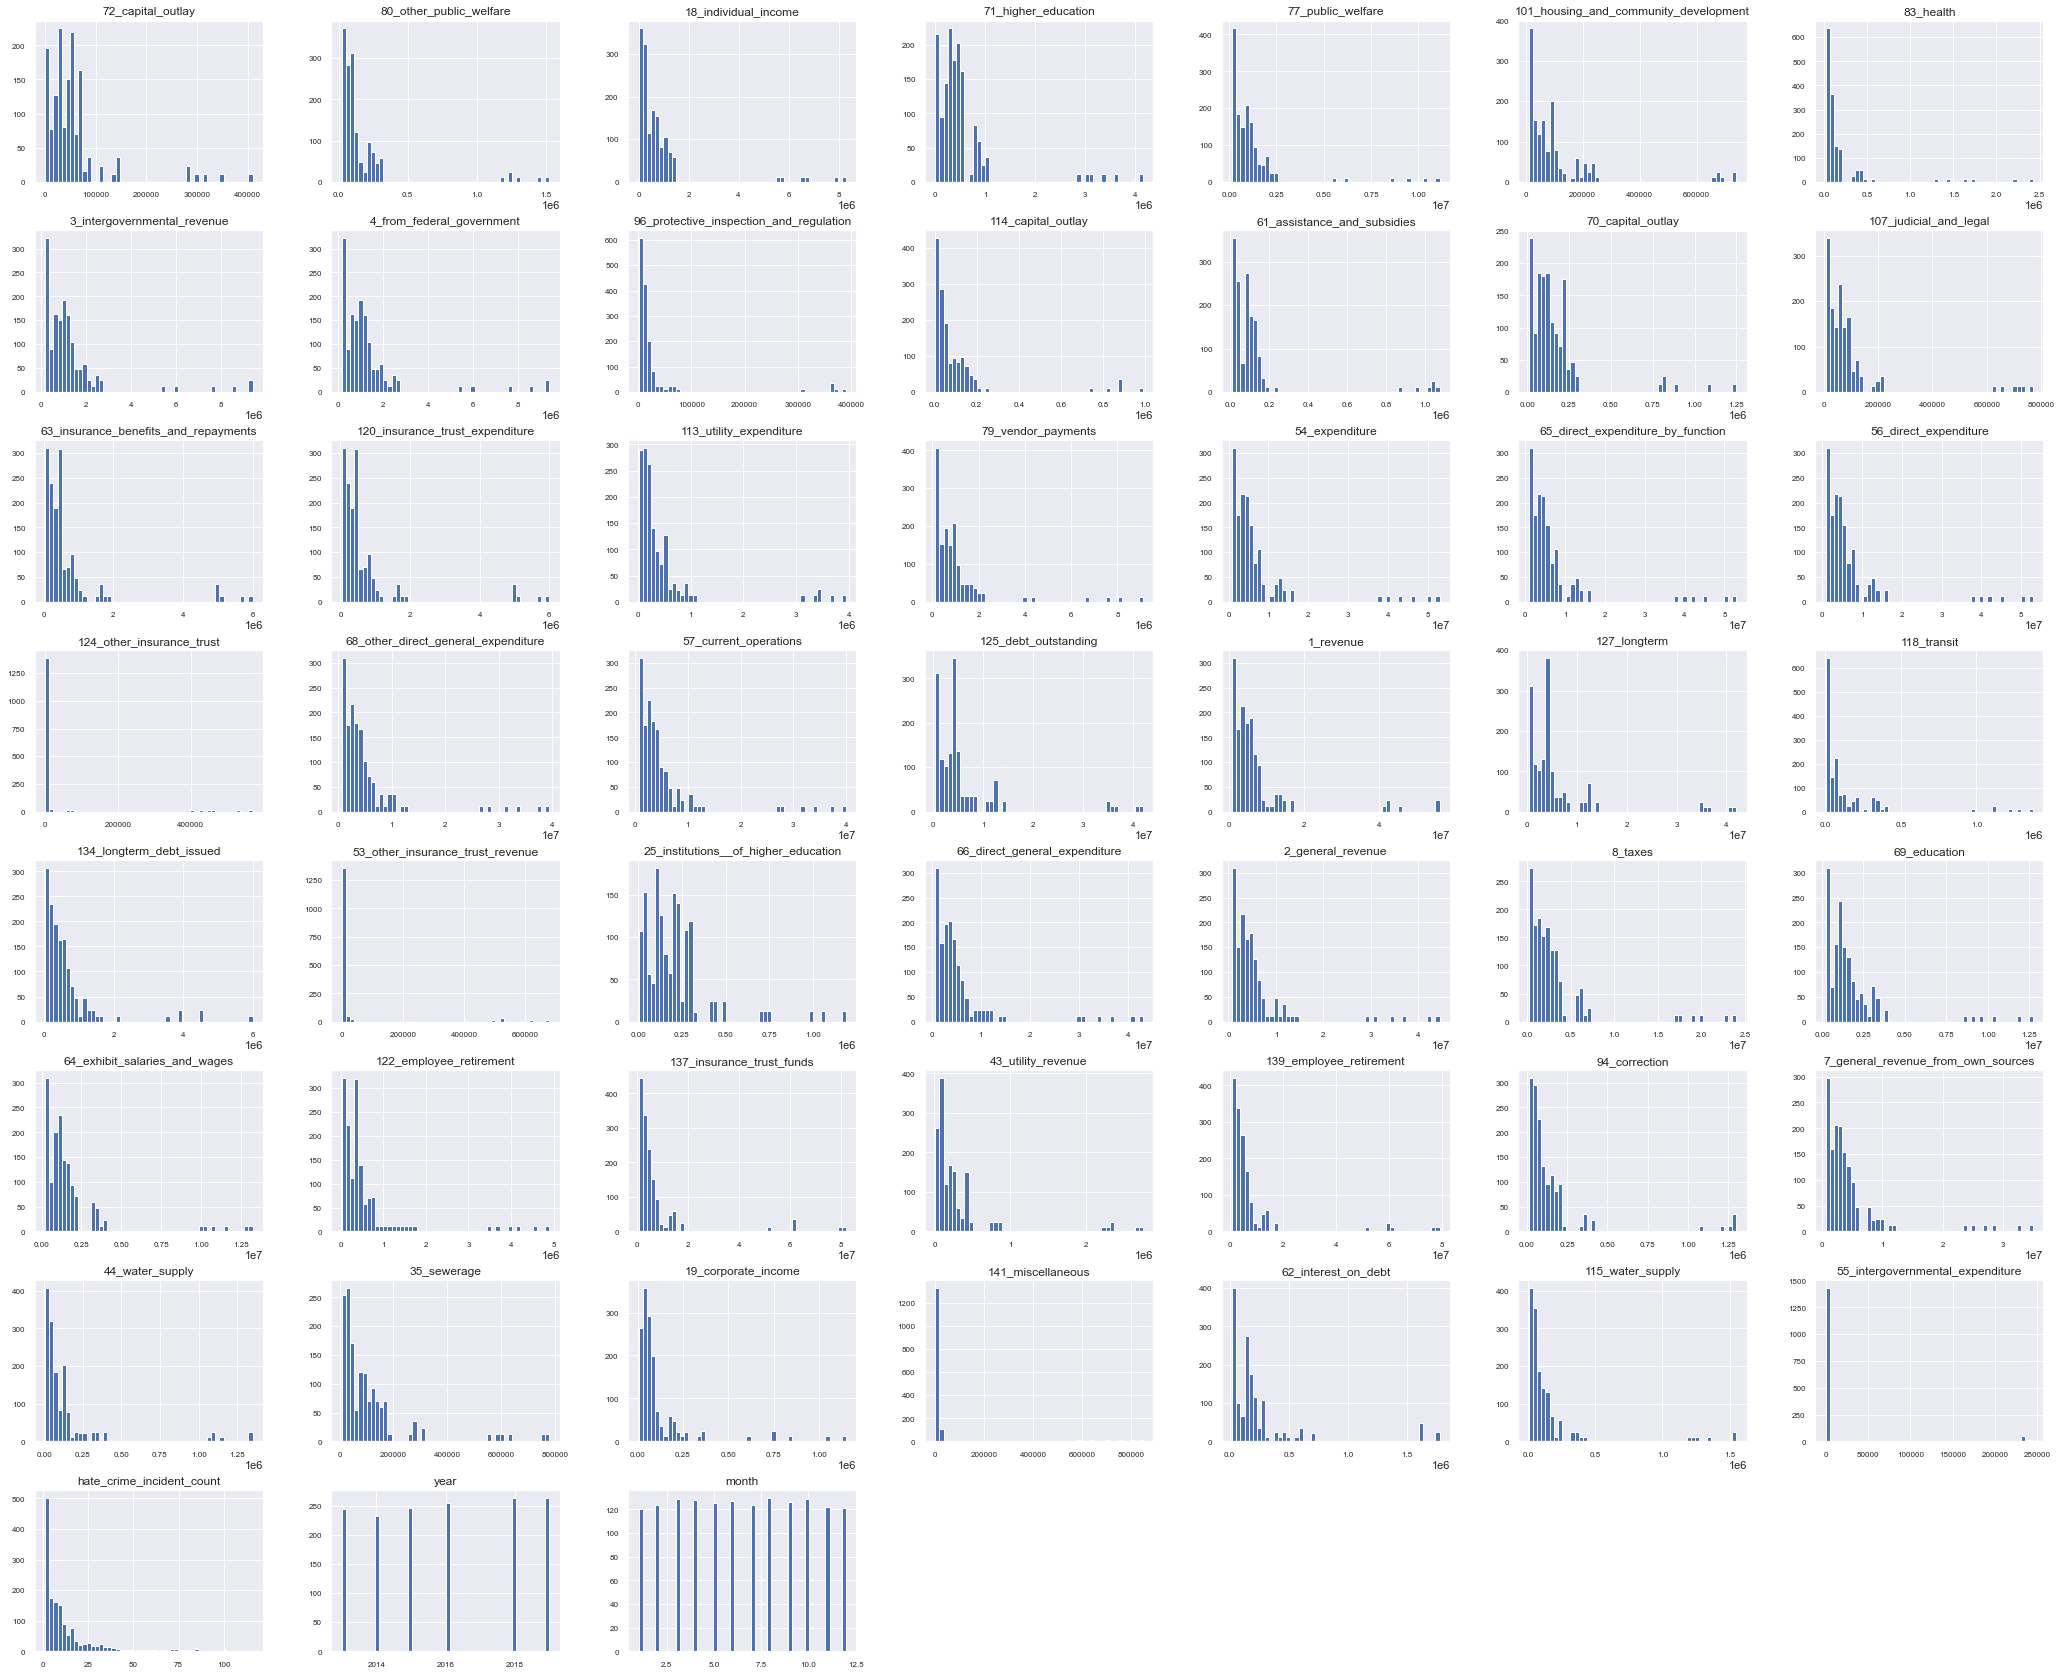

In [56]:
# visual EDA 

#plot the histogram of hate_crime_incident_count to see the distribution of the point data
sns.displot(hc, x="hate_crime_incident_count", height=8, aspect=15/8)

#plot the histogram of all features to see the distribution of the point data
hc.hist(figsize=(36, 30), bins=50, xlabelsize=8, ylabelsize=8);


## Correlation EDA

In [57]:
# correlation EDA
core_value = 0.83

df_num_corr = bea.corr()['hate_crime_incident_count']
# create a golden list of high correlation features values
golden_features_list = df_num_corr[abs(df_num_corr) > core_value].sort_values(ascending=False)
print("There are {} strongly correlated values with a greater than 0.83 correlation with the hate_crime_incident_count:\n{}".format(len(golden_features_list), golden_features_list))

# create a golden list of high correlation features labels
quantitative_features_list = ['72_capital_outlay', '80_other_public_welfare', '18_individual_income', '71_higher_education', '77_public_welfare', '101_housing_and_community_development', '83_health',
    '3_intergovernmental_revenue', '4_from_federal_government', '96_protective_inspection_and_regulation', '114_capital_outlay', '61_assistance_and_subsidies', '70_capital_outlay', '107_judicial_and_legal',
    '63_insurance_benefits_and_repayments', '120_insurance_trust_expenditure', '113_utility_expenditure', '79_vendor_payments']

# By convention, when the
# p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
# the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
# the p-value is  <  0.1: there is weak evidence that the correlation is significant.
# the p-value is  >  0.1: there is no evidence that the correlation is significant.

for x in quantitative_features_list:
    pearson_coef, p_value = stats.pearsonr(bea[x], bea['hate_crime_incident_count'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)      
    
    
# we will use these input features
features = []

for i in range(0,len(hc.columns)):
  feature_add = hc.columns[i]
  features.append(feature_add)

features.remove('hate_crime_incident_count')
print(features)
len(features)


There are 19 strongly correlated values with a greater than 0.83 correlation with the hate_crime_incident_count:
hate_crime_incident_count                  1.000000
72_capital_outlay                          0.864535
80_other_public_welfare                    0.856148
18_individual_income                       0.846547
71_higher_education                        0.844121
77_public_welfare                          0.843684
101_housing_and_community_development      0.839509
83_health                                  0.837209
3_intergovernmental_revenue                0.837084
4_from_federal_government                  0.837084
96_protective_inspection_and_regulation    0.836100
114_capital_outlay                         0.833275
61_assistance_and_subsidies                0.832307
70_capital_outlay                          0.832088
107_judicial_and_legal                     0.831734
63_insurance_benefits_and_repayments       0.831451
120_insurance_trust_expenditure            0.831451
113

51

In [58]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 968 to 684
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   72_capital_outlay                        1505 non-null   int64  
 1   80_other_public_welfare                  1505 non-null   int64  
 2   18_individual_income                     1505 non-null   int64  
 3   71_higher_education                      1505 non-null   int64  
 4   77_public_welfare                        1505 non-null   int64  
 5   101_housing_and_community_development    1505 non-null   int64  
 6   83_health                                1505 non-null   int64  
 7   3_intergovernmental_revenue              1505 non-null   int64  
 8   4_from_federal_government                1505 non-null   int64  
 9   96_protective_inspection_and_regulation  1505 non-null   int64  
 10  114_capital_outlay                       1505 n

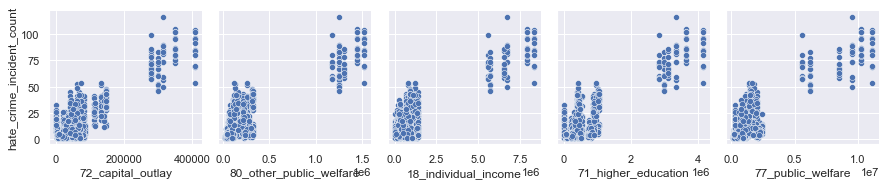

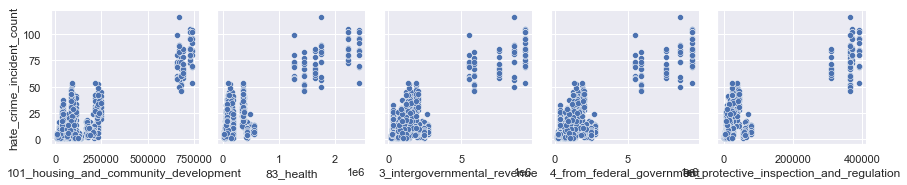

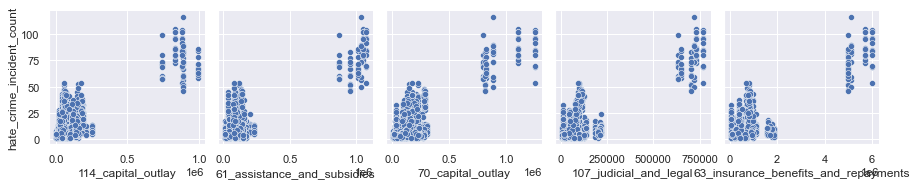

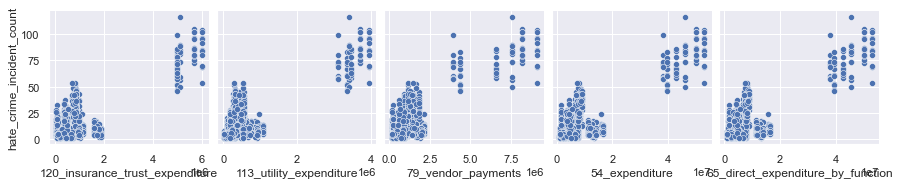

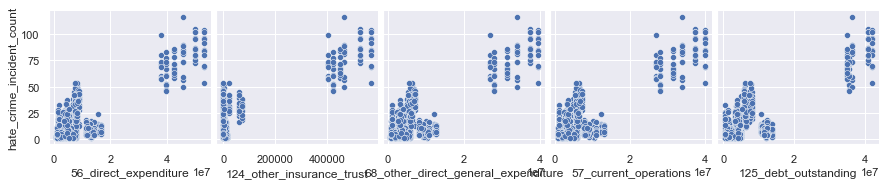

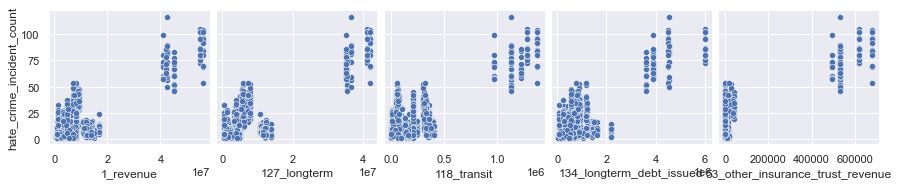

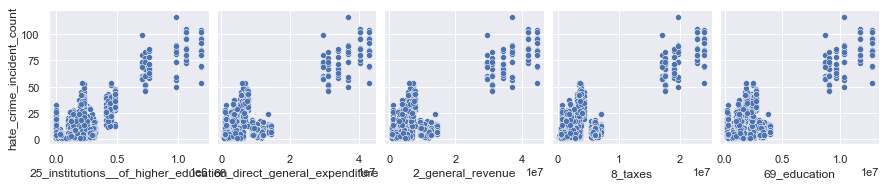

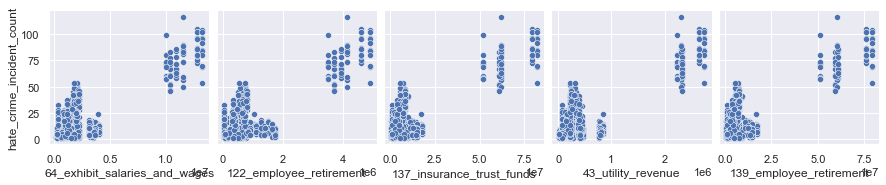

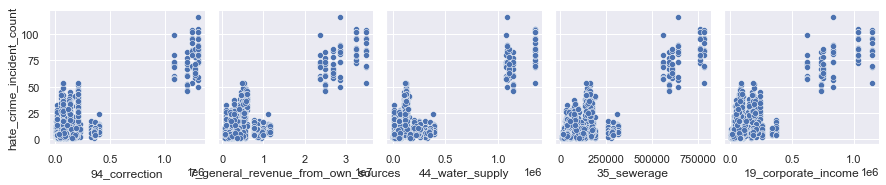

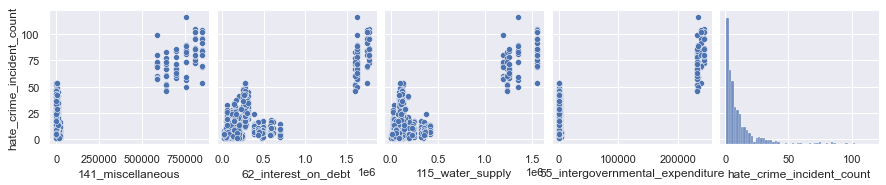

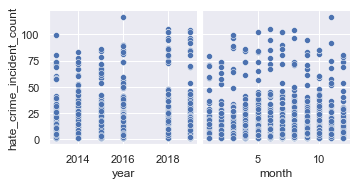

In [59]:
# more EDA 
# display all the correlated values to find outliers

for i in range(0, len(hc.columns), 5):
    sns.pairplot(data=hc,
                x_vars=hc.columns[i:i+5],
                y_vars=['hate_crime_incident_count'])

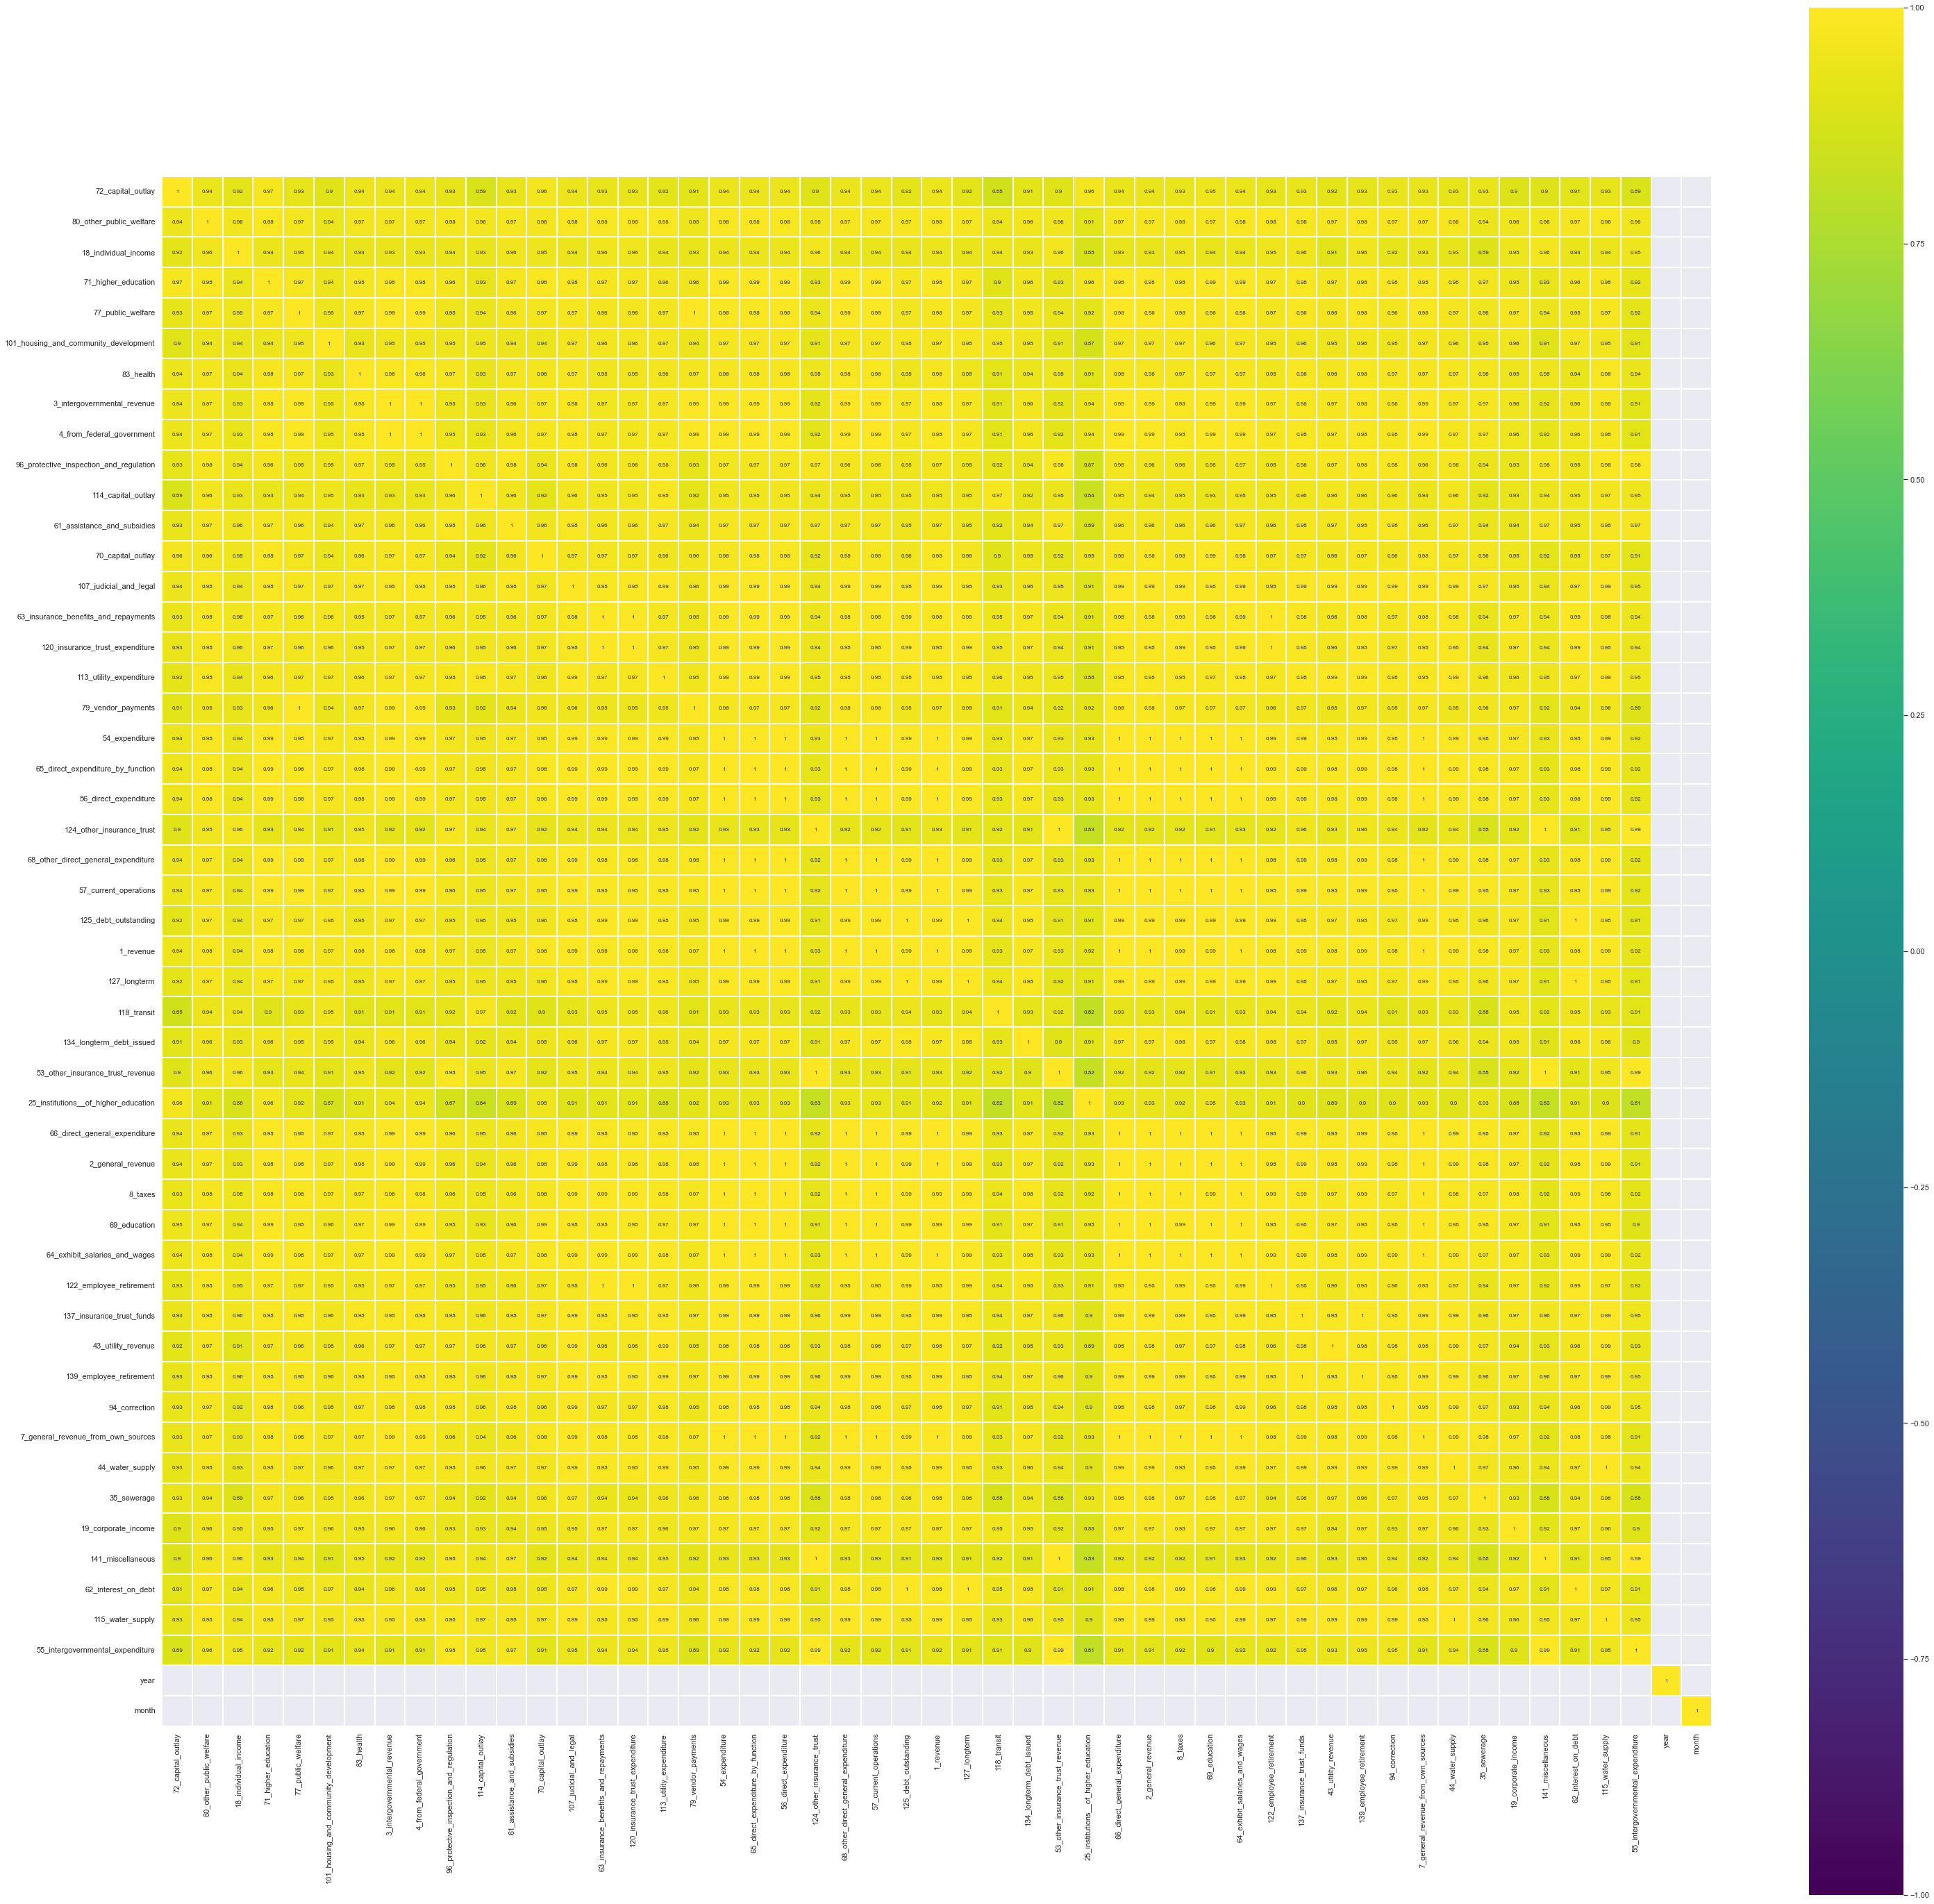

In [60]:
# more correlation EDA 

corr = hc.drop('hate_crime_incident_count', axis=1).corr() 
plt.figure(figsize=(50, 50))

# viridis color
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


### Feature selection

In [61]:
#  quantitative features of our dataframe and how they relate to the hate_crime_incident_count
quantitative_features_list = ['72_capital_outlay', '80_other_public_welfare', '18_individual_income', '71_higher_education', '77_public_welfare', '101_housing_and_community_development', '83_health',
    '3_intergovernmental_revenue', '4_from_federal_government', '96_protective_inspection_and_regulation', '114_capital_outlay', '61_assistance_and_subsidies', '70_capital_outlay', '107_judicial_and_legal',
    '63_insurance_benefits_and_repayments', '120_insurance_trust_expenditure', '113_utility_expenditure', '79_vendor_payments']

df_quantitative_values = bea[quantitative_features_list]

features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]

features_to_analyse.append('hate_crime_incident_count')

print(features_to_analyse)


['72_capital_outlay', '80_other_public_welfare', '18_individual_income', '71_higher_education', '77_public_welfare', '101_housing_and_community_development', '83_health', '3_intergovernmental_revenue', '4_from_federal_government', '96_protective_inspection_and_regulation', '114_capital_outlay', '61_assistance_and_subsidies', '70_capital_outlay', '107_judicial_and_legal', '63_insurance_benefits_and_repayments', '120_insurance_trust_expenditure', '113_utility_expenditure', '79_vendor_payments', 'hate_crime_incident_count']


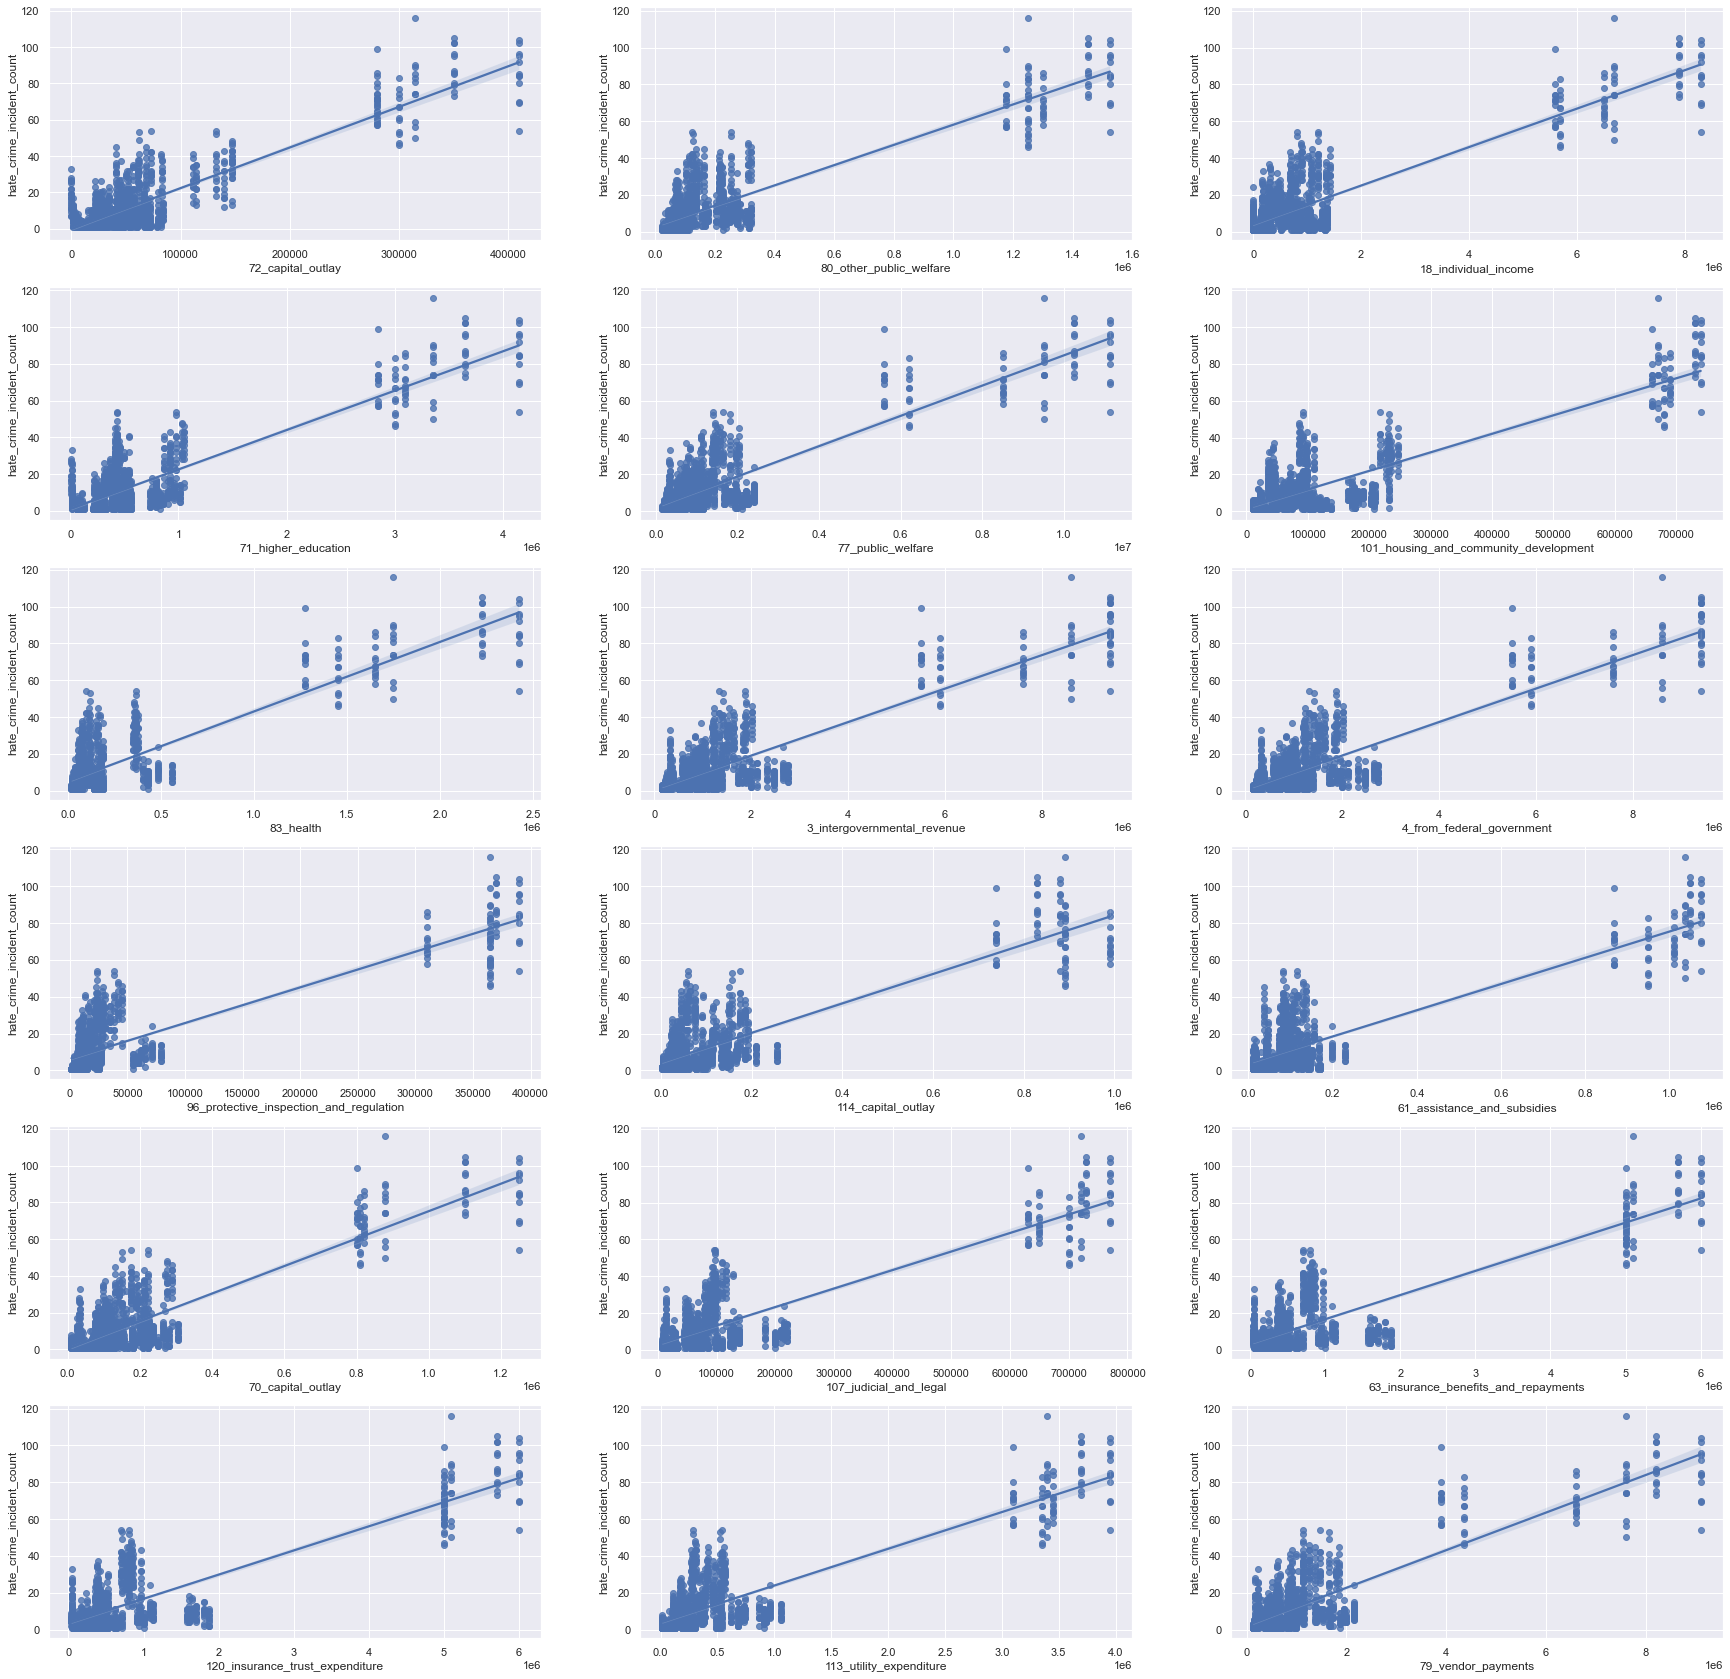

In [62]:
#  plot quantitative features of our dataframe and how they relate to the hate_crime_incident_count
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='hate_crime_incident_count', data=hc[features_to_analyse], ax=ax)

### Train/Test split

In [71]:
# Use a ~80/20 train/test split.
hc_train = hc[:1200]
hc_test = hc[1200:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
hc_train_features = hc_train[features]
hc_test_features = hc_test[features]
hc_train_labels = hc_train['hate_crime_incident_count']
hc_test_labels = hc_test['hate_crime_incident_count']

# Confirm the data shapes are as expected.
print('train data shape:', hc_train_features.shape)
print('train labels shape:', hc_test_features.shape)
print('test data shape:', hc_train_labels.shape)
print('test labels shape:', hc_test_labels.shape)

train data shape: (1200, 51)
train labels shape: (305, 51)
test data shape: (1200,)
test labels shape: (305,)


## Model

``Build model``

In [72]:
def build_model(num_features, learning_rate):
      tf.keras.backend.clear_session()
      tf.random.set_seed(0)
      
      # Build a model using keras.Sequential. While this is intended for neural
      # networks (which may have multiple layers), we want just a single layer for
      # linear regression.
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.Dense(
        units=1,                     # output dim
        input_shape=[num_features],  # input dim
        use_bias=True,               # use a bias (intercept) param
        kernel_initializer=tf.ones_initializer,  # initialize params to 1
        bias_initializer=tf.ones_initializer,    # initialize bias to 1
      ))
      
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      
      # Finally, we compile the model. This finalizes the graph for training.
      # We specify the MSE loss.
      model.compile(loss='mse', optimizer=optimizer)
      
      return model
    

In [75]:
def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)
    
    plt.figure()
    plt.xlabel('40 Epochs')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()
    
    # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final weights:', model.layers[0].get_weights())
    print('Final validaton loss:', list(history['val_loss'])[-1])
    

### Build and Train a Model

model1 = build_model(num_features=51, learning_rate=.0001)


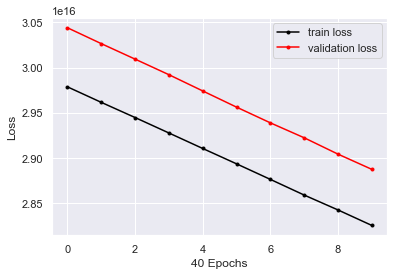

Final train loss: 2.825666500231168e+16
Final weights: [array([[0.970846  ],
       [0.9713403 ],
       [0.9718249 ],
       [0.97094244],
       [0.9714066 ],
       [0.97068906],
       [0.9719946 ],
       [0.9709574 ],
       [0.9709574 ],
       [0.972135  ],
       [0.9714887 ],
       [0.9716509 ],
       [0.97083855],
       [0.9711683 ],
       [0.9711627 ],
       [0.9711627 ],
       [0.9712967 ],
       [0.97138053],
       [0.9709364 ],
       [0.97092754],
       [0.97092754],
       [0.97335976],
       [0.9709134 ],
       [0.9709342 ],
       [0.9707032 ],
       [0.97087497],
       [0.9707162 ],
       [0.9715029 ],
       [0.9709331 ],
       [0.97330755],
       [0.97023207],
       [0.97086775],
       [0.9708563 ],
       [0.97083247],
       [0.970659  ],
       [0.97083735],
       [0.9710921 ],
       [0.97159636],
       [0.97116345],
       [0.9715856 ],
       [0.9712952 ],
       [0.9708363 ],
       [0.9713211 ],
       [0.97062397],
       [0.9712716 ],

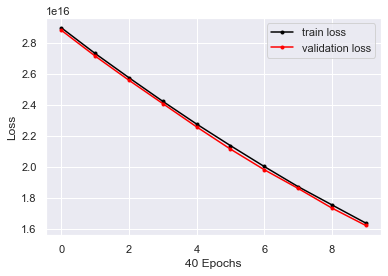

Final train loss: 1.6393212637741056e+16
Final weights: [array([[0.72630894],
       [0.73093855],
       [0.73554033],
       [0.72722346],
       [0.7316297 ],
       [0.72481334],
       [0.73711973],
       [0.72737885],
       [0.72737885],
       [0.7384727 ],
       [0.7323603 ],
       [0.73391044],
       [0.7262303 ],
       [0.7293381 ],
       [0.7292665 ],
       [0.7292665 ],
       [0.73054713],
       [0.73140097],
       [0.7271705 ],
       [0.72707707],
       [0.72707707],
       [0.7500192 ],
       [0.72695225],
       [0.7271531 ],
       [0.72493017],
       [0.72653687],
       [0.7250517 ],
       [0.7324842 ],
       [0.7270665 ],
       [0.74951315],
       [0.72053206],
       [0.7265217 ],
       [0.72640043],
       [0.726172  ],
       [0.72454315],
       [0.7262214 ],
       [0.7286212 ],
       [0.7333462 ],
       [0.7292815 ],
       [0.73324287],
       [0.73053163],
       [0.72621053],
       [0.7307527 ],
       [0.7242    ],
       [0.73029286]

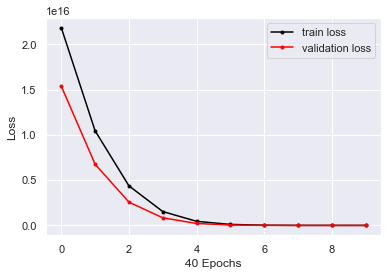

Final train loss: 67030437888.0
Final weights: [array([[-0.00692543],
       [ 0.01205537],
       [ 0.03093133],
       [-0.00263076],
       [ 0.01465529],
       [-0.00891768],
       [ 0.03139158],
       [-0.00182174],
       [-0.00182174],
       [ 0.04438261],
       [ 0.02244311],
       [ 0.02711864],
       [-0.00839522],
       [ 0.00804051],
       [ 0.00652175],
       [ 0.00652175],
       [ 0.01216884],
       [ 0.01300063],
       [-0.00195634],
       [-0.00254791],
       [-0.00254791],
       [ 0.08809403],
       [-0.00331957],
       [-0.00264773],
       [-0.01042795],
       [-0.00738948],
       [-0.00995913],
       [ 0.01912686],
       [-0.00597975],
       [ 0.08582934],
       [-0.02973471],
       [-0.00498298],
       [-0.00625989],
       [-0.00674893],
       [-0.01336261],
       [-0.00565958],
       [ 0.00304443],
       [ 0.01859405],
       [ 0.00631222],
       [ 0.01854742],
       [ 0.0137062 ],
       [-0.00706431],
       [ 0.01032101],
      

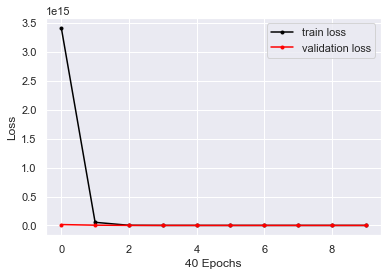

Final train loss: 15776456704.0
Final weights: [array([[ 0.00143906],
       [ 0.00552136],
       [ 0.03165094],
       [-0.00262034],
       [ 0.03208826],
       [-0.00345923],
       [ 0.04125072],
       [ 0.01449431],
       [ 0.01449431],
       [ 0.0151515 ],
       [ 0.00673547],
       [ 0.01634069],
       [-0.00301518],
       [-0.01377273],
       [-0.00508218],
       [-0.00508218],
       [-0.00151384],
       [ 0.0389429 ],
       [-0.00231409],
       [-0.0029532 ],
       [-0.0029532 ],
       [ 0.07579013],
       [ 0.00141121],
       [ 0.00161643],
       [-0.01368559],
       [-0.00897538],
       [-0.01372761],
       [ 0.01296255],
       [ 0.0098948 ],
       [ 0.06263249],
       [-0.0123163 ],
       [-0.00219106],
       [-0.00048196],
       [-0.00398403],
       [-0.01169661],
       [-0.00909003],
       [-0.00603015],
       [ 0.01009291],
       [-0.00509453],
       [ 0.01040804],
       [-0.00360439],
       [-0.00416533],
       [ 0.00013576],
      

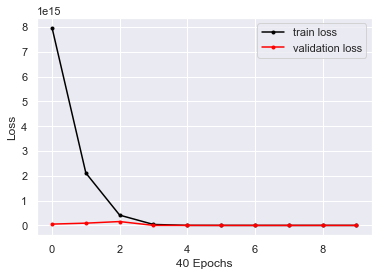

Final train loss: 277970190336.0
Final weights: [array([[ 0.7552106 ],
       [ 0.1909351 ],
       [ 0.24561769],
       [ 0.39338484],
       [-0.00383392],
       [ 0.06493895],
       [-0.08431546],
       [-0.12702139],
       [-0.12702139],
       [ 0.40391496],
       [ 0.31446758],
       [ 0.33356044],
       [ 0.4708142 ],
       [ 0.32066536],
       [ 0.03322524],
       [ 0.03322524],
       [ 0.15318671],
       [-0.07334451],
       [ 0.01641286],
       [ 0.02090172],
       [ 0.02090172],
       [ 0.33395207],
       [-0.04048087],
       [-0.02337957],
       [ 0.00917167],
       [ 0.03390742],
       [ 0.00889672],
       [ 0.03937253],
       [-0.77068394],
       [ 0.42597362],
       [ 0.5264961 ],
       [ 0.01171693],
       [-0.03478008],
       [-0.05977006],
       [ 0.09237076],
       [ 0.02573888],
       [-0.05276277],
       [-0.01664318],
       [ 0.09554486],
       [-0.04190133],
       [ 0.02248056],
       [-0.00953249],
       [-0.05500296],
     

In [77]:
epoch_count = 10

# Build a model.
# learning rates [0.0001, 0.001, 0.01, 0.1, 1]
model1 = build_model(num_features=51, learning_rate=.0001)
model2 = build_model(num_features=51, learning_rate=.001)
model3 = build_model(num_features=51, learning_rate=.01)
model4 = build_model(num_features=51, learning_rate=.1)
model5 = build_model(num_features=51, learning_rate=1)

history = model1.fit(
  x = hc_train_features[features],
  y = hc_train_labels,
  validation_split=0.1,
  epochs=epoch_count,
  batch_size=32,
  verbose=0)
print("model1 = build_model(num_features=51, learning_rate=.0001)")
plot_loss(model1, history)

history = model2.fit(
  x = hc_train_features[features],
  y = hc_train_labels,
  validation_split=0.1,
  epochs=epoch_count,
  batch_size=32,
  verbose=0)
print("model2 = build_model(num_features=51, learning_rate=.001)")
plot_loss(model2, history)

history = model3.fit(
  x = hc_train_features[features],
  y = hc_train_labels,
  validation_split=0.1,
  epochs=epoch_count,
  batch_size=32,
  verbose=0)
print("model3 = build_model(num_features=51, learning_rate=.01)")
plot_loss(model3, history)

history = model4.fit(
  x = hc_train_features[features],
  y = hc_train_labels,
  validation_split=0.1,
  epochs=epoch_count,
  batch_size=32,
  verbose=0)
print("model4 = build_model(num_features=1, learning_rate=.1)")
plot_loss(model4, history)

history = model5.fit(
  x = hc_train_features[features],
  y = hc_train_labels,
  validation_split=0.1,
  epochs=epoch_count,
  batch_size=32,
  verbose=0)
print("model5 = build_model(num_features=51, learning_rate=1)")
plot_loss(model5, history)


In [67]:
# updated labels and remove red line
def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)
    
    plt.figure()
    plt.xlabel('10 Epochs')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    # plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['test loss', 'validation loss'])
    plt.show()
    
    # Show the final train loss value and the learned model weights.
    print('Final test loss:', list(history['loss'])[-1])
    print('Final weights:', model.layers[0].get_weights())
    print('Final validaton loss:', list(history['val_loss'])[-1])

In [68]:
def run_experiment(features, learning_rate):
    
    model = build_model(len(features), learning_rate)
    
    history = model.fit(
        x = hc_train_features[features],
        y = hc_train_labels,
        validation_split=0.1,
        epochs=epoch_count,
        batch_size=32,
        verbose=0
    )
    
    plot_loss(model, history)
    
    # Make predictions on test data
    test_loss = model.evaluate(hc_test_features[features],
                               hc_test_labels,
                               verbose=0
                               )
    
    test_rmse = np.sqrt(test_loss)
    print('Test rmse:', test_rmse)


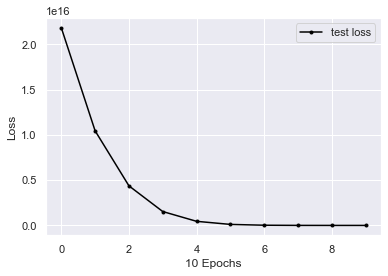

Final test loss: 67030437888.0
Final weights: [array([[-0.00692543],
       [ 0.01205537],
       [ 0.03093133],
       [-0.00263076],
       [ 0.01465529],
       [-0.00891768],
       [ 0.03139158],
       [-0.00182174],
       [-0.00182174],
       [ 0.04438261],
       [ 0.02244311],
       [ 0.02711864],
       [-0.00839522],
       [ 0.00804051],
       [ 0.00652175],
       [ 0.00652175],
       [ 0.01216884],
       [ 0.01300063],
       [-0.00195634],
       [-0.00254791],
       [-0.00254791],
       [ 0.08809403],
       [-0.00331957],
       [-0.00264773],
       [-0.01042795],
       [-0.00738948],
       [-0.00995913],
       [ 0.01912686],
       [-0.00597975],
       [ 0.08582934],
       [-0.02973471],
       [-0.00498298],
       [-0.00625989],
       [-0.00674893],
       [-0.01336261],
       [-0.00565958],
       [ 0.00304443],
       [ 0.01859405],
       [ 0.00631222],
       [ 0.01854742],
       [ 0.0137062 ],
       [-0.00706431],
       [ 0.01032101],
       

In [69]:
run_experiment(features, 0.01)
